# Evaluate ML Classifier Performance using Statistical Hypothesis Testing in Python
**Have a strong argument why picking a classification algorithm over the other based on significance level in performance**

Picking the right machine learning algorithm is decisive, where it decides the performance of the model. The most dominating factor in choosing a model is the performance, which employs the KFold-cross-validation technique to achieve independence.

The chosen model usually has a higher mean performance. Nevertheless, sometimes it originated through a statistical fluke. There are many statistical hypothesis-testing approaches to evaluate the mean performance difference resulting from the cross-validation to address this concern. Using p-value and significance lvl.

comparing the algorithms based on p-value .. Applying the advance technique of 5X2 fold by utilizing the MLxtend library

Examining machine learning models via statistical significance tests requires some expectations that will influence the statistical tests used. The most robust way to such comparisons is called **paired designs**, which compare both models (or algorithms) performance on the same data. That way, both models (or algorithms) have to deal with the same difficulty.

1- **Independent data samples**: used when having an unlimited dataset. You collect n samples for the train, and test dataset. Then calculate ten independent model scores for each method. Finally, apply the t-test to compare models. However, this approach isn’t practical because there is no unlimited data in real.

2- **Ten-fold cross-validation**: It uses the ordinary paired t-test. This method has good repeatability relative to other ways as well as a decent type II error. However, it has a high type I error; that’s why it is not recommended.
Comparing training algorithms via cross-validation makes stronger assumptions than comparing specific (fully trained) models’ predictive performance. Where the resampling validation (to which cross-validation belongs) cannot fully estimate the algorithm comparison’s variance uncertainty.

3- **McNemar’s test**:
In statistics, McNemar’s test is a statistical test used on paired nominal data. It is applied to 2 × 2 contingency tables with a dichotomous trait, with matched pairs of subjects, to determine whether the row and column marginal frequencies are equal (that is, whether there is “marginal homogeneity”). — Wikipedia
It is recommended for the last twenty years. However, this method’s challenge is that you either need to build your functions to implement it or use a third party library where it is not commonly packed up for you in the tools you use.

4- **Non-parametric Paired test**: this method involves making a few assumptions. For example, assuming the distribution of model accuracies has a normal distribution(Gaussian).
The Wilcoxon signed-rank test is a non-parametric version of the paired Student’s t-test. Although the test is non-parametric, it still assumes the independency for observations inside each sample. Although using the k-fold cross-validation would break that assumption.

5- **Estimation statistics**: A data analysis framework that uses a combination of effect sizes, confidence intervals, precision planning, and meta-analysis to plan experiments, analyze data, and interpret results — Wikipedia. Nevertheless, when evaluating the model using the resampling method, the assumption of independence is broken. As an alternative, other statistical resampling methods like bootstrapping. Bootstrapping could estimate a robust non-parametric confidence interval. Hence, we can interpret the results and compare classifiers.

**The intuition behind the 5X2 fold approach**

An approach to evaluate each model on the same k-fold cross-validation split of the data and calculates each split score. That would give a sample of ten scores for ten-fold cross-validation. Then, we can compare those scores using the paired statistical test.

Due to using the same data rows to train the model more than once, the assumption of independence is violated; hence, the test would be biased.
This statistical test could be adjusted to overcome the lack of independence. Also, the number of folds and repeats of the method can be configured to achieve a better sampling of model performance.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('D:/advertising.csv')
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [8]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

Steps to extract the best two models

In this steps, I will conduct a comparison between four different algorithms based on performance accuracy score. Then will select the two models with the highest score to conduct hypothesis testing between them.

In [11]:
from sklearn.model_selection import RepeatedStratifiedKFold , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [39]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state = 1, max_depth=2)))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.90 (0.036)
LDA: 0.96 (0.014)
KNN: 0.72 (0.044)
DTC: 0.93 (0.022)
SVM: 0.72 (0.036)


**Linear discriminant analysis** is primarily used here to reduce the number of features to a more manageable number before classification. Each of the new dimensions is a linear combination of pixel values, which form a template.LDA focuses on finding a feature subspace that maximizes the separability between the groups.

a supervised classification method that is used to create machine learning models. These models based on dimensionality reduction are used in the application, such as marketing predictive analysis and image recognition, amongst others.

In [32]:
# Lets pick LDA and DTC

Steps to hypothesis testing:

The first step would be to to state the null hypothesis statement.

H0: Both models have the same performance on the dataset.
H1: Both models doesn’t have the same performance on the dataset.

Significance level is 0.05

let’s assume a significance threshold of α=0.05 for rejecting the null hypothesis that both algorithms perform equally well on the dataset and conduct the 5x2_cv _t_test.

LDA Mean Accuracy: 96.1% +/-(0.014)
DecisionTreeClassifier Mean Accuracy: 92.6% +/-(0.022)


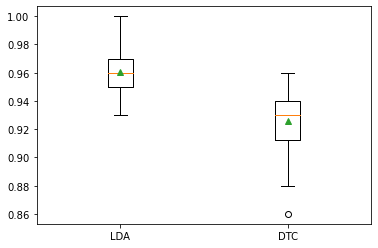

In [38]:
# evaluate model 1
model1 = LinearDiscriminantAnalysis()
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores1 = cross_val_score(model1, X, y, scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('LDA Mean Accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores1*100), np.std(scores1)))

# evaluate model 2
model2 = DecisionTreeClassifier(random_state = 1, max_depth=2)
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores2 = cross_val_score(model2, X, y, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('DecisionTreeClassifier Mean Accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores3*100), np.std(scores3)))
# plot the results
plt.boxplot([scores1, scores2], labels=['LDA', 'DTC'], showmeans=True)
plt.show()

Seems that LDA has a better performance over the DTC where LDA has a higher accuracy.

# 5 by 2 CV using MLxtend package
You can implement the 5X2 CV fold from scratch; however, there is a nice package that saves you much time called MLxtend.

I will use the paired_ttest_5x2cv function from the evaluation module to calculate the t and p value for both models.

In [56]:
#!pip install mlxtend
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, 
                          estimator2=model2, 
                          X=X, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=44)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.036
The t-statistics is = 2.837
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


Now you have a strong argument about why picking LDA over the DTC.